In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

In [5]:
pip install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 2.0 MB/s eta 0:00:05
                                              0.1/9.2 MB 1.8 MB/s eta 0:00:05
     -                                        0.3/9.2 MB 3.0 MB/s eta 0:00:03
     --                                       0.6/9.2 MB 3.7 MB/s eta 0:00:03
     ---                                      0.8/9.2 MB 4.4 MB/s eta 0:00:02
     -----                                    1.2/9.2 MB 4.9 MB/s eta 0:00:02
     ------                                   1.5/9.2 MB 5.2 MB/s eta 0:00:02
     -------                                  1.8/9.2 MB 5.1 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 5.1 MB/s eta 0:00:02
     ---------                                2.2/9.2 MB 5.0 MB/s eta 0:00:02
     ----------                               2.5/9.2 MB 5.2 MB/s eta 0:00:02
     -----------                              2.7/9.2 MB 5.2 MB/s eta 0

In [7]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     ----                                    30.7/293.3 kB 1.3 MB/s eta 0:00:01
     ------------------                     143.4/293.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import statsmodels.api as sm
import seaborn as sns

In [9]:
#Some Defatult Values
PATH = "C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR,S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR,E_MONTH, E_DAY)


In [10]:
#function that returns df from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', parse_dates=True)

    except FileNotFoundError:
        print("File Does Not Exist")

    else:
        return df


1689

,Adj Close
Date,
2017-01-03,39.306999
2017-01-04,39.345001
2017-01-05,39.701000
2017-01-06,40.307499
2017-01-07,40.307499
...,...
2021-08-14,138.406006
2021-08-15,138.406006
2021-08-16,138.916000


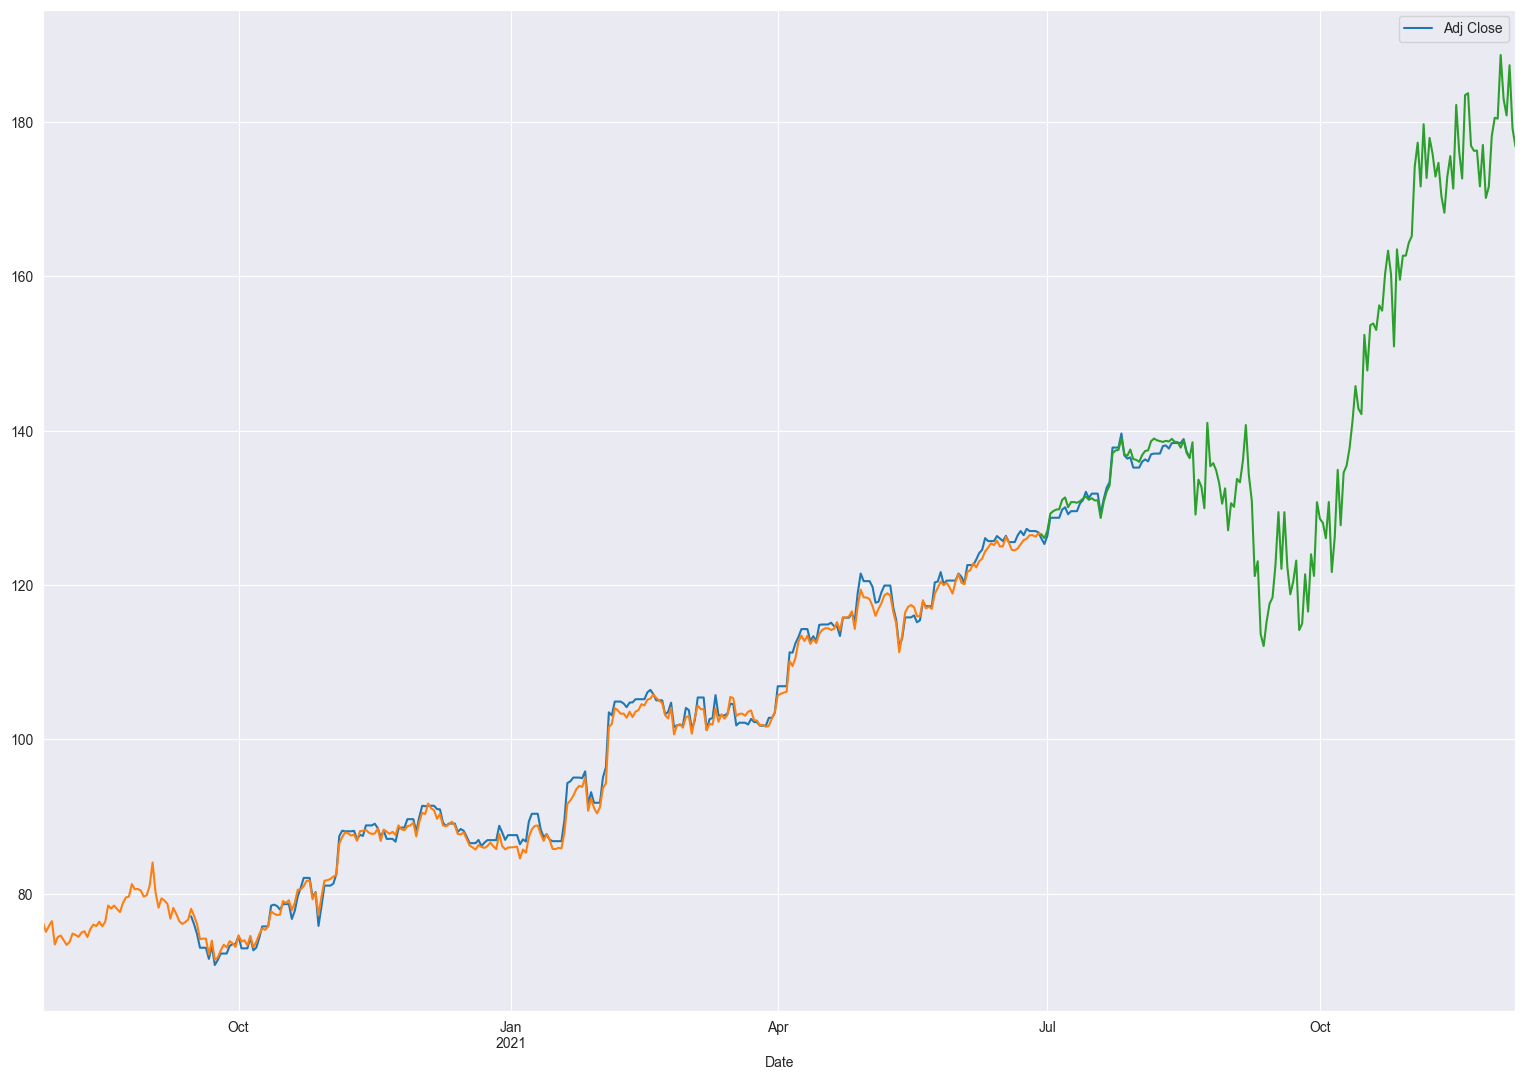

: 

In [20]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
a_df = get_df_from_csv("GOOG")
a_df = a_df.asfreq('d')
a_df = a_df.fillna(method='ffill') #fill missing values

a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

a_df = a_df.drop(['Daily_Return'], axis=1)

sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(19,13))

fig, ax = plt.subplots()
lags = ar_select_order(a_df, maxlag=30) #returns lag of data
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

#display(len(a_df), a_df)
#len a_df = 1689, we take 80% of this as training data

train_df = a_df.iloc[50:round(0.8*len(a_df))] #skip first 50 datapoints for better results
test_df = a_df.iloc[round(0.8*len(a_df)):]

train_model = AutoReg(a_df['Adj Close'], 800).fit(cov_type="HC0") #800 samples
start = len(train_df)
end = len(train_df)+len(test_df)-1

prediction = train_model.predict(start=start, end=end, dynamic=True)

ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)

forecast = train_model.predict(start=end , end = end+160, dynamic = True)
ax = forecast.plot(ax=ax)

